# Tanda Tangan

Avav Abdillah Sam F551 23 020

In [1]:
import os
import numpy as np
import cv2 as cv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

In [2]:
# Load and preprocess images
TrainPath = r'E:\\Tugas\\Project_KB\\data_augmented'
categories = ['Abi', 'Aqilah', 'Avav', 'Briant', 'Eci', 'Fahril', 'Fakmal', 'Fila', 'Fitri', 'Haliim', 'Ica', 'Lyra', 'Marvel', 'Novi', 'Puput', 'Qhiran', 'Raiyan', 'Tika', 'Via', 'Zaky']

data = []

for category in categories:
    label = categories.index(category)
    path = os.path.join(TrainPath, category)
    for img in os.listdir(path):
        imgPath = os.path.join(path, img)
        try:
            imgArray = cv.imread(imgPath)
            imgResized = cv.resize(imgArray, (200, 200))
            image = np.array(imgResized).flatten()
            data.append([image, label])
            print("success load image from ", imgPath)
        except Exception as e:
            print("error load image from ", imgPath)
            pass

error load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\.DS_Store
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_0.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_10.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_11.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1192.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1193.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1194.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1195.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1196.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1197.png
success load image from  E:\\Tugas\\Project_KB\\data_augmented\Abi\aug_1198.png
success load image from  E:\\Tugas\\Project_KB\\data_au

In [3]:
# Save data to pickle file
with open('dataImage.pickle', 'wb') as pick:
    pickle.dump(data, pick)
print("success save data image")

success save data image


In [4]:
# Load data from pickle file
with open('dataImage.pickle', 'rb') as pick:
    data = pickle.load(pick)

In [5]:
# Separate features and labels
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [6]:
# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [7]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2)

In [8]:
# Train the model
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

print("Model training completed")

Model training completed


In [9]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()
print("Model saved")

Model saved


In [10]:
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()
print("Model loaded")

Model loaded


Model accuracy:  0.5045454545454545
Prediction:  Tika


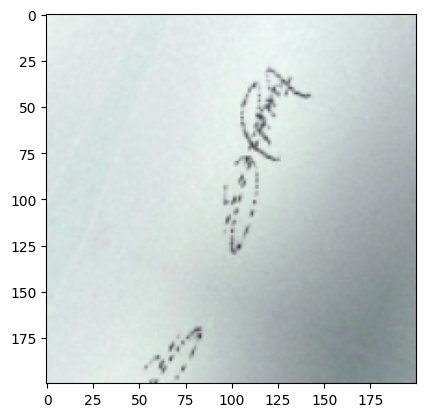

In [11]:
categories = ['Abi', 'Aqilah', 'Avav', 'Briant', 'Eci', 'Fahril', 'Fakmal', 'Fila', 'Fitri', 'Haliim', 'Ica', 'Lyra', 'Marvel', 'Novi', 'Puput', 'Qhiran', 'Raiyan', 'Tika', 'Via', 'Zaky']
predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print("Model accuracy: ", accuracy)
print("Prediction: ", categories[predict[0]])

mySign = xtest[0].reshape(200, 200, 3)
plt.imshow(mySign, cmap='gray')
plt.show()